In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         25 non-null     object 
 1   Meaning           25 non-null     float64
 2   Ideas             25 non-null     float64
 3   Values            25 non-null     float64
 4   Stay              25 non-null     float64
 5   Satisfied         25 non-null     float64
 6   engagement_score  25 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.5+ KB


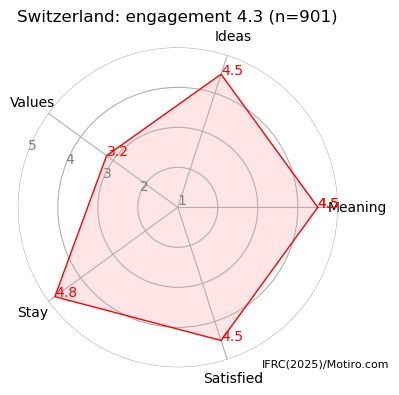

In [ ]:
## Provides a spider graph showing Motiro dashboard indicators
# For testing purpose:
NS='SRC'
# Load the dataset
#file_path = 'Individual.csv'
#df = pd.read_csv(file_path, sep=",", encoding='utf-8')
df = pd.read_csv('Individual.csv', sep=",", encoding='utf-8')
#df.info()

## select which team, circle, category of respondent, etc. to display
team='Switzerland'
## select which variables (grouped in a "dimension") to display
#dimension='leadership'
#dimension='management'
#dimension='needs'
#dimension='health'
dimension='engagement'

# Filter the dataframe for 'Team Name'
#df = df[df['Team Name'] == team]
#df = df[df['region'] == team]
df = df[df['Country'] == team]
#df.info()

#For circles (groups of teams), further filtering might be required:
#df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of respondents in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define variable sets (dimensions)
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

dimension_vars = eval(f'{dimension}_vars')
all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Compute team's scores for selected dimension
mean_df = df.groupby('Team Name')[dimension_vars].mean().reset_index()
#mean_df = df.groupby('region')[dimension_vars].mean().reset_index()
# Create a new column with the mean of the selected dimension
mean_df[f'{dimension}_score'] = mean_df[dimension_vars].mean(axis=1)
dimension_score = mean_df[f'{dimension}_score'].values.round(1)[0]

mean_df.info()

# Plot radar chart
# number of variable
categories = dimension_vars
N = len(categories)
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = mean_df.loc[0].drop(['Team Name', f'{dimension}_score']).values.flatten().tolist()
#values = mean_df.loc[0].drop(['region', f'{dimension}_score']).values.flatten().tolist()
values = [round(v, 1) for v in values]
values += values[:1]  # Repeat the first value to close the circular graph
plt.figure(figsize=(8, 8))
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
# Ensure the values list has the same length as the angles list
if len(values) != len(angles):
	values = values[:len(angles)]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=10)
# Draw ylabels
ax.set_rlabel_position(160)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=10)
plt.ylim(1, 5)
# Add values to the plot
for i in range(len(values)):
    ax.annotate(values[i], (angles[i], values[i]), color='red', size=10)

# Plot data
ax.plot(angles, values, linewidth=1, color="red", linestyle='solid')
# Fill area
ax.fill(angles, values, 'r', alpha=0.1)
 # change the color of the line around the area
ax.spines['polar'].set_visible(False)


# adjust plot size in figure
plt.subplots_adjust(left=0.5, right=0.9, top=3, bottom=0.1)
# put more space between plot title and plot
#plt.subplots_adjust(top=1)


# Add a title
plt.title(f'{team}: {dimension} {dimension_score} (n={n})', size=12)
plt.text(5.2, 5.5, "IFRC(2025)/Motiro.com", size=8)

# Save the plot
plt.savefig(f'{NS}_{team}_{dimension}_spider.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


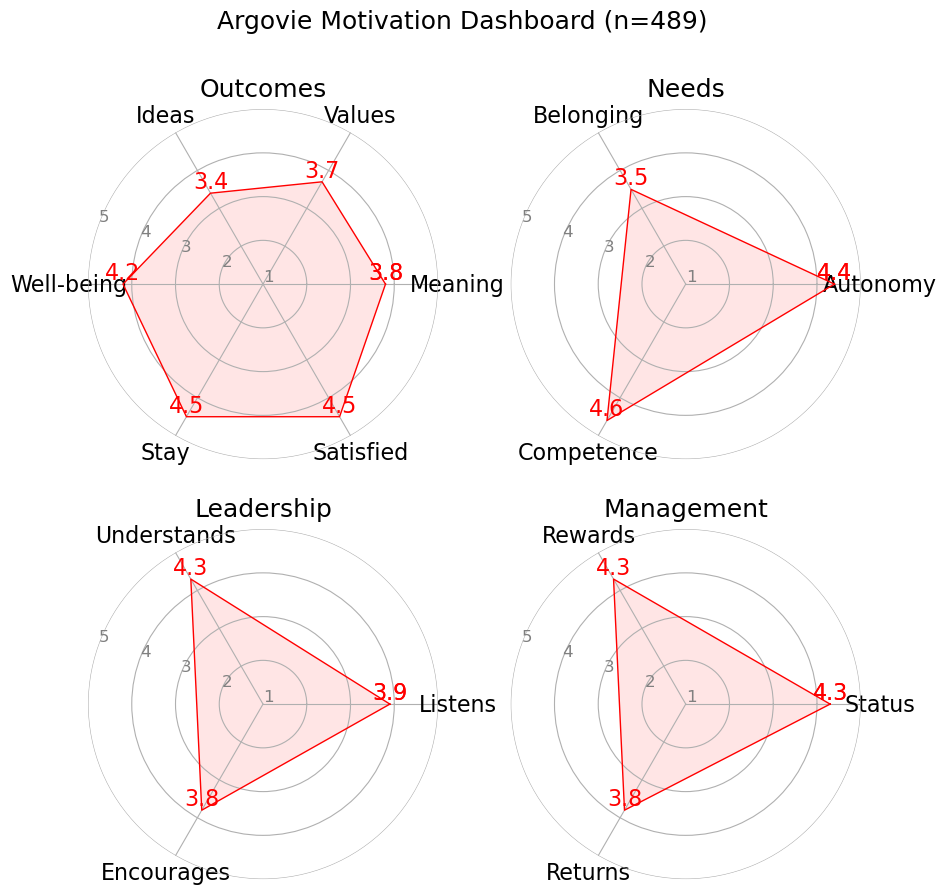

In [11]:
## Create a figure containing all the spider graphs for all volunteers and staff in a team

#file_path = 'Individual.csv'
file_path = f'{NS}_ALL.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
#df.info()

## select which team, circle, category of respondent, etc. to display
team='Argovie'
## select which variables (grouped in a "dimension") to display
#dimension='leadership'

# Filter the dataframe for 'Team Name'
#df = df[df['Team Name'] == team]
#df = df[df['Position'] == team]
df = df[df['region'] == team]
#df.info()

#For circles (groups of teams), further filtering might be required:
#df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of respondents in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define variable sets (dimensions)
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Values', 'Ideas', 'Well-being', 'Stay', 'Satisfied']
outcomes_vars = ['Meaning', 'Values', 'Ideas', 'Well-being', 'Stay', 'Satisfied']

management = ['Status', 'Rewards', 'Returns']
leadership = ['Listens', 'Understands', 'Encourages']
needs = ['Autonomy', 'Belonging', 'Competence']
outcomes= ['Meaning', 'Values', 'Ideas', 'Well-being', 'Stay', 'Satisfied']

# Define the dimensions to display
dimensions = ['outcomes', 'needs', 'leadership', 'management']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# Set the title of the figure
fig.suptitle(f'{team} Motivation Dashboard (n={n})', size=18)

# Remove all frames, axes, ticks before loop
for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # Remove all frames, axes, ticks before loop
    for ax in axes.flatten():
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])

# Loop over the dimensions
for i, dimension in enumerate(dimensions):
    # Compute the dimension score
    dimension_vars = eval(f'{dimension}_vars')
    mean_df = df.groupby('Position')[dimension_vars].mean().reset_index()
    # Create a new column with the mean of the selected dimension
    mean_df[f'{dimension}_score'] = mean_df[dimension_vars].mean(axis=1)
    dimension_score = mean_df[f'{dimension}_score'].values.round(1)[0]

    values = mean_df.loc[0].drop(['Position', f'{dimension}_score']).values.flatten().tolist()
    values = [round(v, 1) for v in values]
    values += values[:1]  # Repeat the first value to close the circular graph
    # Compute the angles
    N = len(dimension_vars)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = axes[i//2, i%2]
    ax = plt.subplot(2, 2, i+1, polar=True)
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], dimension_vars, color='black', size=16)
    # Draw ylabels
    ax.set_rlabel_position(160)
    plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=12)
    plt.ylim(1, 5)
    # Add values to the plot
    for j in range(len(values)):
        ax.annotate(values[j], (angles[j], values[j]), color='red', ha='center', va='bottom', size=16)
    # Plot data
    ax.plot(angles, values, linewidth=1, color="red", linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'r', alpha=0.1)
  # Remove polar spines and background
    ax.spines['polar'].set_visible(False)
    ax.set_frame_on(False)  # Turn off subplot frame
    for spine in ax.spines.values():  # Ensure all spines are invisible
        spine.set_visible(True)

    # Add a title
    ax.set_title(f'{dimension.capitalize()}', size=18)
    # Save the plot
plt.savefig(f'{team}_spider.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 86 to 10663
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         901 non-null    object 
 1   Survey Data       901 non-null    object 
 2   Well-being        901 non-null    float64
 3   Needs             901 non-null    float64
 4   Engagement        901 non-null    float64
 5   Autonomy          901 non-null    float64
 6   Belonging         901 non-null    float64
 7   Competence        901 non-null    float64
 8   Leadership        901 non-null    float64
 9   Management        901 non-null    float64
 10  Returns           901 non-null    float64
 11  Rewards           901 non-null    float64
 12  Status            901 non-null    float64
 13  Myself            901 non-null    int64  
 14  Tasks             901 non-null    int64  
 15  Free              901 non-null    int64  
 16  Mastery           901 non-null    int64  
 17 

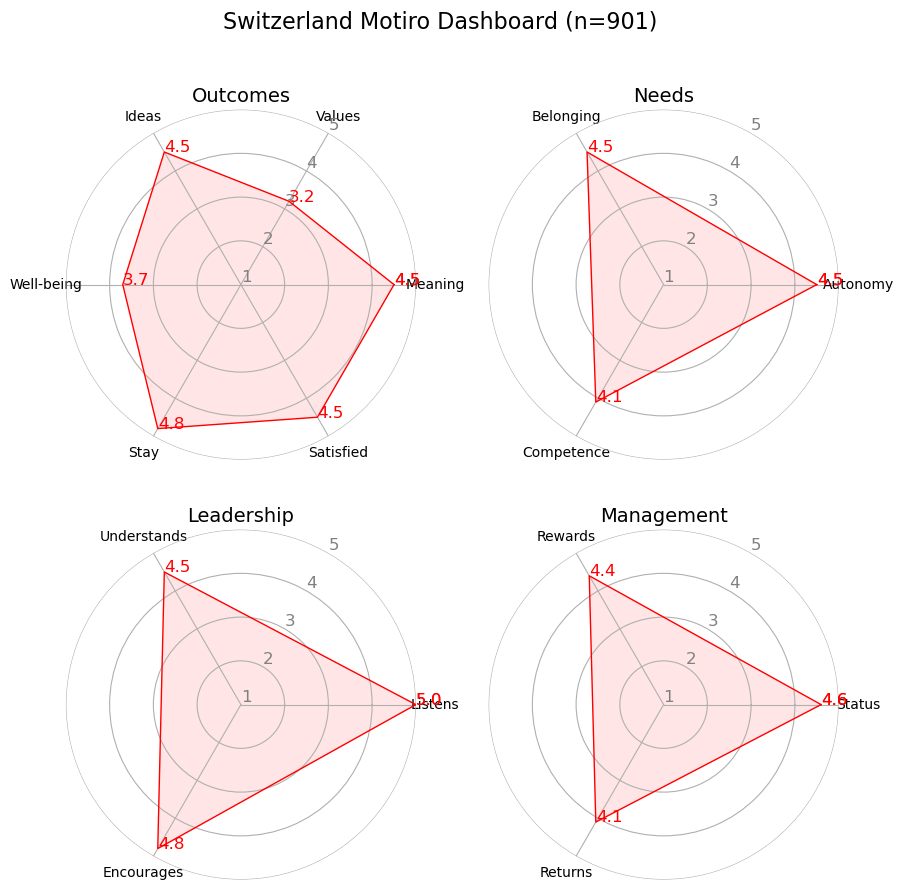

In [3]:
## Create a figure containing all the spider graphs for one team

# For testing purpose:
NS='SRC'
# Load the dataset
file_path = 'Individual.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
#df.info()

## select which team, circle, category of respondent, etc. to display
team='Switzerland'
## select which variables (grouped in a "dimension") to display
dimension='leadership'

# Filter the dataframe for 'Team Name'
#df = df[df['Team Name'] == team]
#df = df[df['region'] == team]
df = df[df['Country'] == team]
df.info()

#For circles (groups of teams), further filtering might be required:
#df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of respondents in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define variable sets (dimensions)
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Values', 'Ideas', 'Well-being', 'Stay', 'Satisfied']
outcomes_vars = ['Meaning', 'Values', 'Ideas', 'Well-being', 'Stay', 'Satisfied']

management = ['Status', 'Rewards', 'Returns']
leadership = ['Listens', 'Understands', 'Encourages']
needs = ['Autonomy', 'Belonging', 'Competence']
outcomes= ['Meaning', 'Values', 'Ideas', 'Well-being', 'Stay', 'Satisfied']

# Define the dimensions to display
dimensions = [ 'outcomes', 'needs', 'leadership', 'management']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# Set the title of the figure
fig.suptitle(f'{team} Motiro Dashboard (n={n})', size=16)

# Remove all frames, axes, ticks before loop
for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # Remove all frames, axes, ticks before loop
    for ax in axes.flatten():
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])

# Loop over the dimensions
for i, dimension in enumerate(dimensions):
    # Compute the dimension score
    dimension_vars = eval(f'{dimension}_vars')
    #mean_df = df.groupby('region')[dimension_vars].mean().reset_index()
    mean_df = df.groupby('Team Name')[dimension_vars].mean().reset_index()
    # Create a new column with the mean of the selected dimension
    mean_df[f'{dimension}_score'] = mean_df[dimension_vars].mean(axis=1)
    dimension_score = mean_df[f'{dimension}_score'].values.round(1)[0]

    #values = mean_df.loc[0].drop(['region', f'{dimension}_score']).values.flatten().tolist()
    values = mean_df.loc[0].drop(['Team Name', f'{dimension}_score']).values.flatten().tolist()
    values = [round(v, 1) for v in values]
    values += values[:1]  # Repeat the first value to close the circular graph
    # Compute the angles
    N = len(dimension_vars)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = axes[i//2, i%2]
    ax = plt.subplot(2, 2, i+1, polar=True)
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], dimension_vars, color='black', size=10)
    # Draw ylabels
    ax.set_rlabel_position(60)
    plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=12)
    plt.ylim(1, 5)
    # Add values to the plot
    for j in range(len(values)):
        ax.annotate(values[j], (angles[j], values[j]), color='red', size=12)
    # Plot data
    ax.plot(angles, values, linewidth=1, color="red", linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'r', alpha=0.1)
  # Remove polar spines and background
    ax.spines['polar'].set_visible(False)
    ax.set_frame_on(False)  # Turn off subplot frame
    for spine in ax.spines.values():  # Ensure all spines are invisible
        spine.set_visible(True)


    # Add a title
    ax.set_title(f'{dimension.capitalize()}', size=14)
    # Save the plot
plt.savefig(f'{NS}_{team}_spider.png', bbox_inches='tight', pad_inches=0.1)
plt.show()